# Sürekli Değişkenler (Continuous Variables) İle  Kuantum Hesaplama


Bilindiği gibi herhangi bir durumun zaman içindeki değişimi süreklilikle ifade edilip bir dalgaya karşılık gelmektedir. 

Genel olarak sürekli değişkenler sürekli spektrumlu bir operatörün özdeğerleridir.
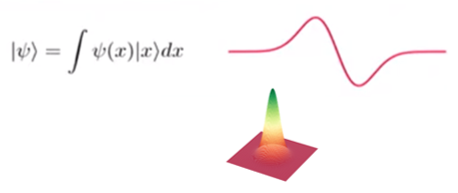


    
Elektromanyetik alanın konum,momentum operatörleri(x,p) gibi özdeğerleri sürekli
değişkenleri uygulayabilen sürekli spektrumlu operatörlerdendir.


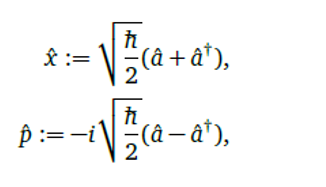

Burada, a ve a† sırasıyla annihilation (yok etme) ve creation (oluşturma) operatörleridir.

Sürekli Değişkenler ve kübit arasındaki  temel karşılaştırması aşağıdaki tabloda yer almaktadır.
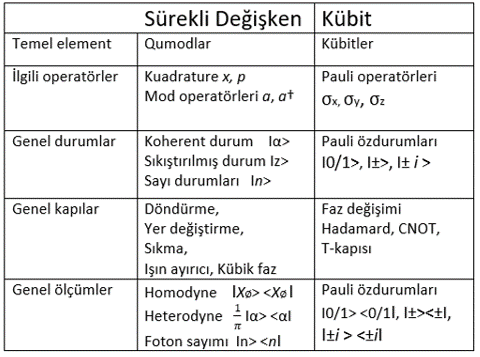























 <li>Fotonik Kuantum Hesaplama
    
 IBM,D-Wave,Rigetti gibi kuantum bilgisyarlarda bilgi 0 veya 1 değerlerini ve süperpozisyon durumlarını alabilen kübitlerde saklanıyor. 
    
   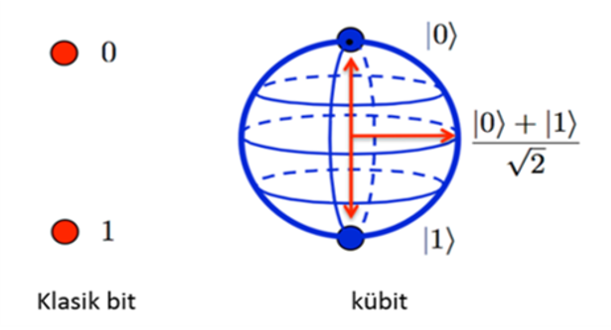
    
   Fotonik kuantum hesaplamada bilgi sürekli bir değişken olan  "qumod"lara kodlanır.
  
  
    
 

    
    
    
    

Fotonik temelli kuantum heasplamada qumodların kullanılmasının sebebi ışığın elektromanyetik bir dalga olmasından dolayıdır.
    
    
    

Qubit durumları ve sürekli değişkenler
    
    
   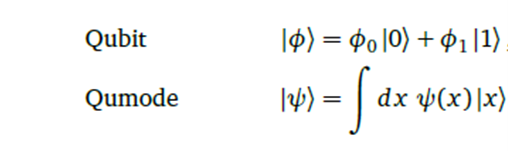
    
Kübitler için ayrı bir katsayı kullanılırken,sürekli değişken sistemleri için sürekliliğe sahip bir durum vardır.
    
Bu Gauss durumumlarının daha genel sürekli değişken durum ailesinin özel durumudur.
    
   
   temel durum ve fock durumu
    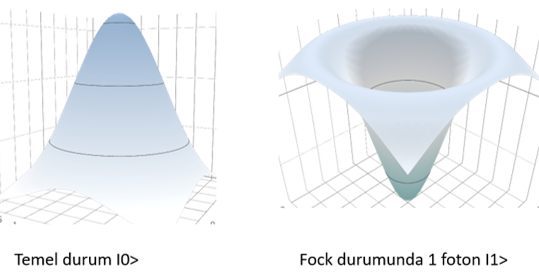
   
    
   
    
    

# Sürekli Değişkenler aşağıdaki farklı  durumlar ile gösterilir

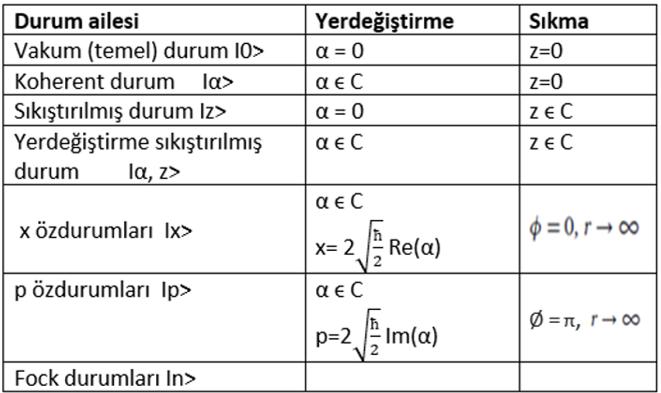


# 1)Gaussian Durumlar
    
Vakum durumu başlangıç durumudur.
Diğer durumlar vakum durumunun aşağıdaki gibi geliştirilmesiyle oluşturulabilir.
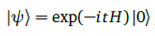

Burada H bozonik bir Hamiltoniyen'dir.
    
 yani a ve a† sırasıyla  annihilation (yok etme) ve creation (oluşturma) operatörleri, t ise evrim zamanıdır.
      
# 2)Fock durumarı
   Sürekli Gauss durumlarının tamamlayıcısı, n'nin negatif olmadığı ayrı Fock durumları (veya sayı durumları) ın>'dir.
  

# 3)Vakum durumu(Temel durum)
   Sıfır foton durumudur.
    
   Tüm modlar vakum durumundan oluşturulur.
    

# 4)Koherent Durum

   Yer değiştirmiş bir vakum durumudur.
    
   Bun durum minimum belirsizlik durumudur ve yok etme operatörünün özdurumudur.
    

# 5)Sıkıştırma Durumu

   Bir vakum durumunun kuantum karşılığı olandalganın sıkıştırlmasını,daraltılması durumudur.
    
    
# 6)Diplacement(yerdeğiştirme) Sıkıştırma Durumu

  Temel durumun önce sıkma operatörü ile sıkıştırılıp sonra yer değiştirme operatörü
   uygulanarak elde edildiği durumdur










 # Bazı önemli Sürekli değişken kapıları



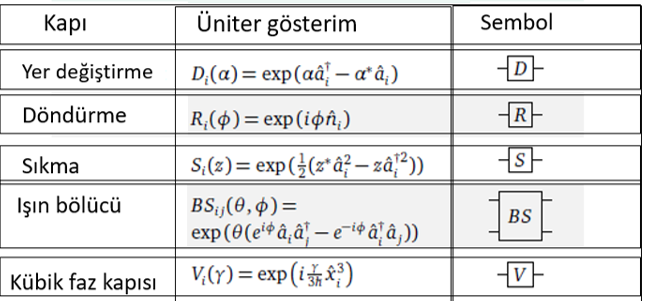










#  Sürekli değişken sistemde Tek ve İki modlu kapılar

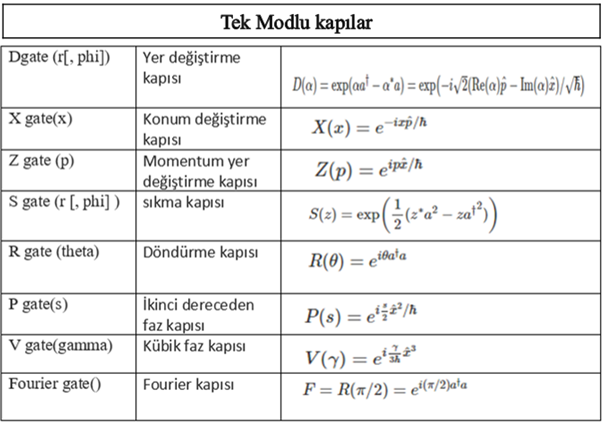
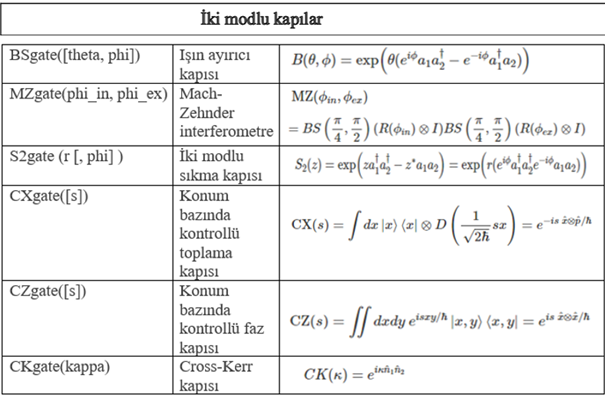

# Sürekli Değişken sistemde ölçümler

Sürekli değişken sistemde ölçümler Gaussian ve Gaussian olmayan(non-Gaussian) ölçümler olarak ikiye ayrılır.

Gaussian ölçümler homodyne ve heterodyne ölçümleridir.

Foton sayımı Gaussian olmayan ölçümdür.



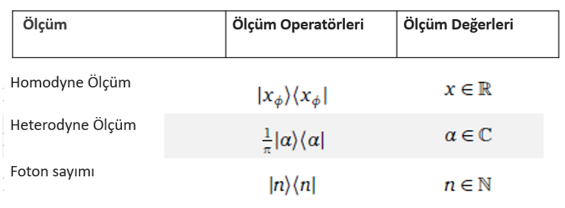







# Ölçme işlemi 

In [13]:
import strawberryfields as sf
from strawberryfields.ops import *


In [14]:
prog = sf.Program(2)                       #>>>> 2 qumod 
eng = sf.Engine("fock", backend_options={"cutoff_dim": 6}) 
with prog.context as q:
    Fock(2) | q[0]                  #>>>>>> fock durumunda 2 foton
    Fock(3) | q[1]                  #>>>>>> fock durumunda 3 foton
    BSgate() | (q[0], q[1])         #>>>>>  Işın bölücü(Beamsplitter) kapısı 
    MeasureFock(select=0) | q[0]    #>>>>>  Fock bazında  foton sayma ölçümü,qumod0 için
    MeasureFock() | q[1]            #>>>>>  Fock bazında  foton sayma ölçümü,qumod1 için

result = eng.run(prog)                
result.samples

array([[0, 5]])

 #  Sürekli değişken  Kapı Operatörleri 3D ile görselleştirme

In [15]:
import strawberryfields as sf
from strawberryfields.ops import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
prog = sf.Program(1)
with prog.context as q:
    Vac | q[0]

eng = sf.Engine('gaussian')
state = eng.run(prog).state

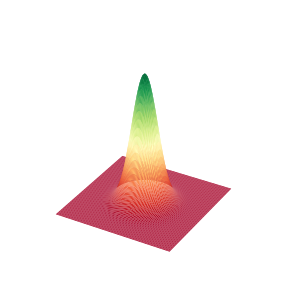

In [17]:
 # Vakum (TEMEL DURUM)

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

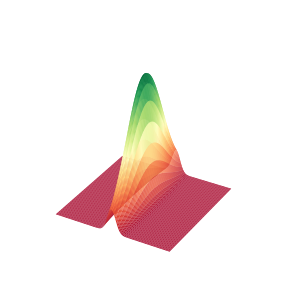

In [18]:
# Squeezing Gate(Sıkma)

prog = sf.Program(1)
with prog.context as q:
    S = Sgate(1)
    S | q[0]

state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(4.8, 5)
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.set_axis_off()

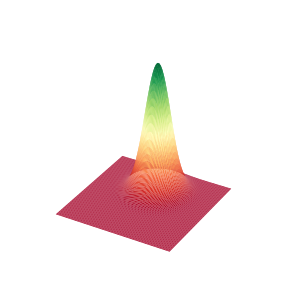

In [19]:
#Rotation Gate(Dödürme kapısı)

prog = sf.Program(1)
with prog.context as q:
    Dgate(1) | q[0]
    Rgate(np.pi/2) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

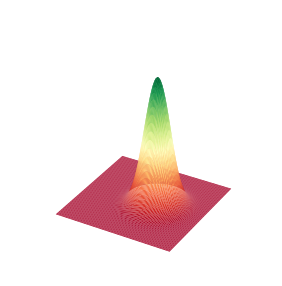

In [20]:
#Displacement Gate(yer değiştrime kapısı)

prog = sf.Program(1)
with prog.context as q:
    Dgate(0.55) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

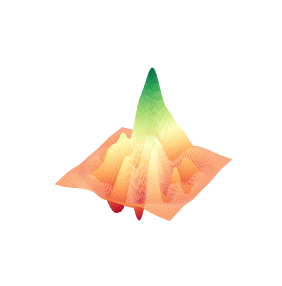

In [21]:
# Kübik Faz kapısı
prog = sf.Program(1)
with prog.context as q:
    gamma = 2
    Vgate(gamma) | q[0]

eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})
state = eng.run(prog).state

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

# Sürekli Değişkenler ile  Teleportasyon 

# State Teleportation(Durum Teleportasyonu)

Kuantum ışınlanması - bazen kapı ışınlamasıyla karıştırılmaması için durum ışınlaması olarak da anılır 
klasik bir iletim kanalı ve kuantum dolaşıklığı kullanılarak, uzaysal olarak ayrılmış kübitler veya kumodlar arasında bilinmeyen bir kuantum durumunun güvenilir bir şekilde aktarılmasıdır.

Temel bir kuantum bilgi protokolü olarak kabul edilen bu protokol, kuantum iletişiminden kuantum hesaplamada dağıtılmış bilgi işlemeyi etkinleştirmeye kadar değişen uygulamalara sahiptir.

Genel olarak, tüm kuantum ışınlanma devreleri aynı temel ilkeye göre çalışır. 

İki uzak operatör, Alice ve Bob, maksimum düzeyde dolaşık bir kuantum durumunu paylaşır (ayrık değişkenlerde, dört Bell durumundan herhangi biri ve CV'lerde, sabit bir enerji için maksimum dolaşık durum) ve klasik bir iletişim kanalına erişimleri vardır.
Alice, transfer etmek istediği bilinmeyen bir duruma sahip
Bob, Bell ya da kareleme temeline projeksiyon yaparak bilinmeyen durum ve onun dolaşık durumunun yarısının ortak bir ölçümünü yapar.
Ölçüm sonuçlarını Bob'a ileterek, Bob daha sonra, bir koşullu faz çevirme (kübitler için) veya 
yer değiştirme (qumodes için) gerçekleştirerek, dolanık halin yarısını orijinal bilinmeyen durumun doğru bir kopyasına dönüştürebilir.

In [123]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
from numpy import pi, sqrt

In [124]:
np.random.seed(1)

In [125]:
prog = sf.Program(3)
alpha = 2+1j        #>>>>> teleport edilecek durum: koherent 2+1j durumu
r = np.abs(alpha)
phi = np.angle(alpha)

In [126]:
with prog.context as q:
    # Başlangıç durumu hazırlama
    Coherent(r, phi) | q[0]  #>>>>> teleport edilecek durum: koherent 2+1j durumu
    Squeezed(-2) | q[1]
    Squeezed(2) | q[2]

    # kapıların uygulanması
    BS = BSgate(pi/4, pi)
    BS | (q[1], q[2])
    BS | (q[0], q[1])

    # Alice tarafından Ölçümlerin yapılması
    MeasureX | q[0]
    MeasureP | q[1]

    #Alice tarafından yapılan Ölçümlere göre
    #Bob'un uyguladığı yer değiştirme kapıları
    Xgate(sqrt(2) * q[0].par) | q[2]
    Zgate(sqrt(2) * q[1].par) | q[2]

In [127]:
eng = sf.Engine('fock', backend_options={"cutoff_dim": 5}) # Programın yürütülmesi

In [128]:
result = eng.run(prog, shots=1, modes=None, compile_options={}) # Sonuçları yazdırma ve histogram gösterimi 

In [129]:
print(result.samples)
print(result.state)
state = result.state
print(state.dm().shape)
rho2 = np.einsum('kkllij->ij', state.dm())
print(rho2.shape)
probs = np.real_if_close(np.diagonal(rho2))
print(probs)

[[ 0.48465485 -0.53895539]]
<FockState: num_modes=3, cutoff=5, pure=False, hbar=0.5>
(5, 5, 5, 5, 5, 5)
(5, 5)
[0.18451263 0.19737924 0.23077483 0.19080754 0.12082132]


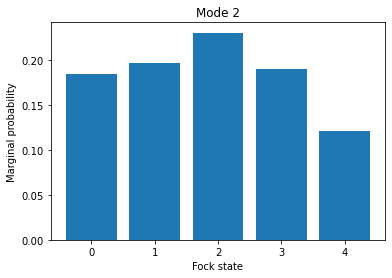

In [130]:
from matplotlib import pyplot as plt
plt.bar(range(5), probs[:5])
plt.xlabel('Fock state')
plt.ylabel('Marginal probability')
plt.title('Mode 2')
plt.show()

In [131]:
fock_probs = state.all_fock_probs()
fock_probs.shape
np.sum(fock_probs, axis=(0,1))

array([0.18451263, 0.19737924, 0.23077483, 0.19080754, 0.12082132])

# Gate Teleportation(Kapı Teleportasyonu)

In [156]:
import strawberryfields as sf
from strawberryfields.ops import *
from numpy import pi, sqrt

In [157]:
prog = sf.Program(3)
with prog.context as q:
    

    Squeezed(0.1) | q[0]
    Squeezed(-2)  | q[1]  # başlangıç durumlarını hazırlama
    Squeezed(-2)  | q[2]
    
    Rgate(0.5)    | q[1]  # teleport edilecek kapı (R döndürme kapısı)
    
    
    CZgate(1) | (q[0], q[1])
    CZgate(1) | (q[1], q[2])  # koşullu faz dolanıklığının oluşturulması
    
    Fourier.H | q[0]
    MeasureX | q[0]     # konum quadreture operatörlerinin ölçümü
    Fourier.H | q[1]
    MeasureX | q[1]


In [158]:
eng = sf.Engine('fock', backend_options={'cutoff_dim': 5}) # Programın yürütülmesi
result = eng.run(prog) 

In [159]:
result.samples
print(result.state)
state = result.state
state.dm().shape

<FockState: num_modes=3, cutoff=5, pure=False, hbar=0.5>


(5, 5, 5, 5, 5, 5)

In [160]:
import numpy as np
rho2 = np.einsum('kkllij->ij', state.dm())
rho2.shape

(5, 5)

[0.22333468 0.32238262 0.39439585 0.04605216 0.01383469]


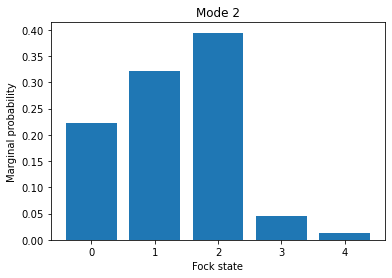

In [161]:
probs = np.real_if_close(np.diagonal(rho2))
print(probs)

from matplotlib import pyplot as plt
plt.bar(range(5), probs[:5])
plt.xlabel('Fock state')
plt.ylabel('Marginal probability')
plt.title('Mode 2')
plt.show()

# Kaynaklar

# [1] M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000).

# [2] https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep5_Quantum_Teleportation.ipynb

# [3]Strawberry Fields: A Software Platform for Photonic Quantum Computing
Nathan Killoran, Josh Izaac, Nicolás Quesada, Ville Bergholm, Matthew Amy, and
Christian Weedbrook Xanadu, 372 Richmond St W, Toronto, M5V 1X6, Canada

# [4]https://strawberryfields.readthedocs.io/en/stable/introduction/states.html
